# Practicum 2
*SVM Clasification on Data Citra*

## Import dataset Labeled Faces in the Wild

*a dataset containing thousands of faces of public figures Note: images data must had same dimension each other, in this case is 62x47 pixels*

In [10]:
# import dataset Labeled Faces in the Wild (LFW)
from sklearn.datasets import fetch_lfw_people
# load the dataset with minumum 60 images per person
faces = fetch_lfw_people(min_faces_per_person=60)
# print the information of the dataset
# target_names = name of the person
print(f'person names: {faces.target_names}')
# number of classes
print(f'number of classes or person: {len(faces.target_names)}')
# number of images and size of the image
# 1348 images with size 62x47 pixels
print(f'data shape: {faces.images.shape}')

person names: ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
number of classes or person: 7
data shape: (1277, 62, 47)


## Show some images from the dataset

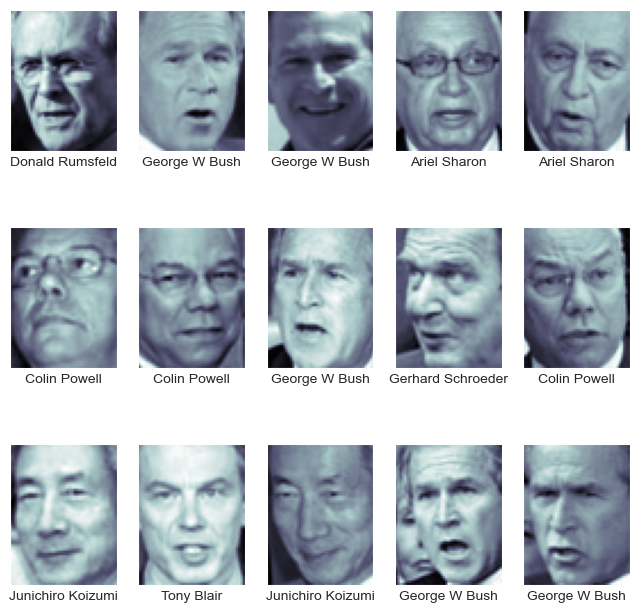

In [11]:
# show 15 images from the dataset
import matplotlib.pyplot as plt
# show 15 images with 3 rows and 5 columns
fig, ax = plt.subplots(3, 5, figsize=(8, 8))
# loop for each image and show the image
# 'i' is for the index of the image
# and axi is the axis of the image
# ax.flat is a 1D iterator over the subplots
# so we can have 'i' and axi from the loop
for i, axi in enumerate(ax.flat):
    # faces.images is a 3D array with shape (1348, 62, 47)
    # faces.images[i] is the i-th image
    axi.imshow(faces.images[i], cmap='bone')
    # xticks and yticks are the ticks on x and y-axis
    # ticks means the value of the axis
    # why we pass [] to xticks and yticks?
    # because we don't want to show the value of the axis
    # faces.target is the label of the images
    # faces.target_names is the name of the label
    # faces.target[i] is the label of the i-th image
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])


##  Feature Engineering

Using svc for classification in image, why use svc? because svc is a good classifier for image classification. But, the problem is the dimensionality of the data is too high, so we need to reduce the dimensionality of the data. In this case PCA is used

PCA is used to reduce the dimensionality of the data, this is useful for reduce the computational cost and also reduce the overfitting. In this case, we use PCA to reduce the dimensionality of the data from 2914 to 150, 2914 is dimension from each pixel in image, in case our data 62 X 47 = 2914.

Pipeline is used to combine the PCA and SVC, this is userful for hide the intermediate steps.In this case, we use make_pipeline to combine PCA and SVC, what's means combine? it means that the output of PCA will be the input of SVC.


In [12]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# reduce the dimensionality of the data from 2914 to 150
# whiten=True means normalize the data
# random_state=42 means the random state
# why 42? because 42 is theory the answer of everything(jokes in statistic)
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
# use svc for classification
# kernel='rbf' means the kernel of the svc is radial base function
# class_weight='balanced' means the class weight is balanced
# weight in this case is the weight of the class in the dataset
# if the class is imbalance, we can use class_weight='balanced'
# because the class_weight='balanced' will give the weight of the class
# based on the number of the class in the dataset 
svc = SVC(kernel='rbf', class_weight='balanced')
# combine PCA and SVC
# the output of PCA will be the input of SVC
model = make_pipeline(pca, svc)

## Split the data into training and testing

In [13]:
# split the data into training and testing
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

## Search best params C and gamma

In [14]:
# use grid search to search the best params C and gamma
from sklearn.model_selection import GridSearchCV
# param_grid is the grid of the params
# svc__C means the C in the svc
# svc__gamma means the gamma in the svc
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, n_jobs=-1)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: total: 812 ms
Wall time: 2.78 s
{'svc__C': 10, 'svc__gamma': 0.005}
0.846340532286213


## Predict the Data

In [15]:
# apply grid.best_estimator_ to the model
# grid.best_estimator_ is the best model from the grid search
# also before we search with GridSearchCV, model is pipeline of PCA and SVC
# so the best model from the grid search is also pipeline of PCA and SVC
model = grid.best_estimator_
yfit = model.predict(Xtest)
print(model)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=10, class_weight='balanced', gamma=0.005))])


## Show the result

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

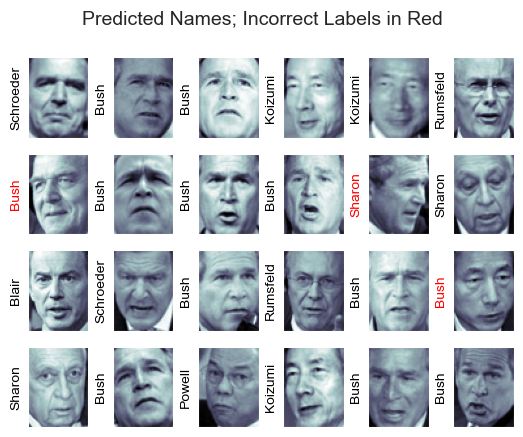

In [16]:


# create the plot for the result
# 4 rows and 6 columns
fig, ax = plt.subplots(4, 6)
# loop for each image
# 'i' is the index of the image
# axi is the axis of the image
# ax.flat is a 1D iterator over the subplots
# so we can have 'i' and axi from the loop
for i, axi in enumerate(ax.flat):
    # show the image
    # Xtest[i] is the i-th image
    # Xtest[i].reshape(62, 47) is the reshape of the i-th image
    # why we use reshape(62, 47)?
    # because the original shape of the image is 62x47 pixels
    # so we need to reshape the image to the original shape
    # cmap='bone' means the color map of the
    # image is bone, bone is a colormap for matplotlib 
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    # xticks and yticks are the ticks on x and y-axis
    # ticks means the value of the axis
    # why we pass [] to xticks and yticks?
    # because we don't want to show the value of the axis
    axi.set(xticks=[], yticks=[])
    # set the title of the image with the predicted label
    # yfit[i] is the predicted label of the i-th image
    # ytest[i] is the true label of the i-th image
    # faces.target_names is the name of the label
    # faces.target_names[yfit[i]] is the name of the predicted label
    # faces.target_names[ytest[i]] is the name of the true label
    # faces.target_names[yfit[i]].split()[-1] is the last name of the predicted label
    # why we use split()[-1]?
    # because the name of the label is 'Firstname Lastname'
    # so we need to split the name and get the last name 
    # why we use [-1]?
    # because the last name is the last element of the list
    # color='black' if yfit[i] == ytest[i] else 'red'
    # if the predicted label is the same as the true label
    # the color of the title is black
    # if the predicted label is different from the true label
    # the color of the title is red
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)



## Show the classification report

In [17]:
from sklearn.metrics import classification_report 
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.54      0.61        13
     Colin Powell       0.78      0.88      0.83        66
  Donald Rumsfeld       1.00      0.60      0.75        30
    George W Bush       0.82      0.94      0.88       139
Gerhard Schroeder       0.94      0.71      0.81        24
Junichiro Koizumi       1.00      0.82      0.90        17
       Tony Blair       0.93      0.81      0.86        31

         accuracy                           0.84       320
        macro avg       0.88      0.76      0.81       320
     weighted avg       0.86      0.84      0.84       320


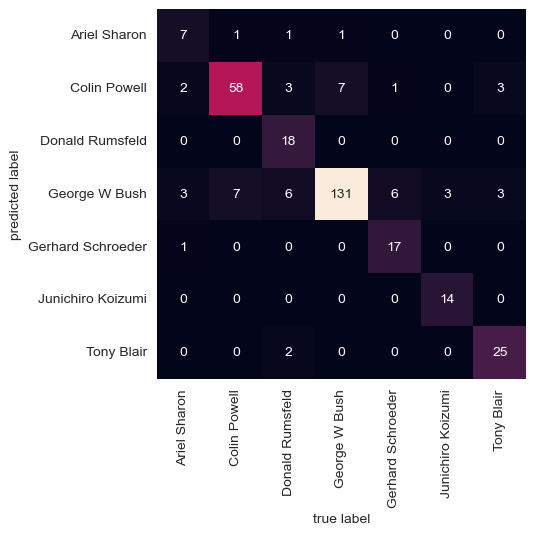

Class                TP         TN         FP         FN        
---------------------------------------------------------
Ariel Sharon         7          304        3          6         
Colin Powell         58         238        16         8         
Donald Rumsfeld      18         290        0          12        
George W Bush        131        153        28         8         
Gerhard Schroeder    17         295        1          7         
Junichiro Koizumi    14         303        0          3         
Tony Blair           25         287        2          6         
---------------------------------------------------------
Total                270        1870       50         50        


In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

# show the confusion matrix in text for comparison
# Prepare to store TP, TN, FP, FN
results = []
# Calculate TP, TN, FP, FN for each class
for i, label in enumerate(faces.target_names):
    TP = mat[i, i]  # True Positives
    TN = mat.sum() - (mat[i, :].sum() + mat[:, i].sum() - TP)  # True Negatives
    FP = mat[:, i].sum() - TP  # False Positives
    FN = mat[i, :].sum() - TP  # False Negatives
    results.append((label, TP, TN, FP, FN))
# print header
print("{:<20} {:<10} {:<10} {:<10} {:<10}".format("Class", "TP", "TN", "FP", "FN"))
print("-" * 57)

# Initialize totals
total_TP = total_TN = total_FP = total_FN = 0
# print results
for label, TP, TN, FP, FN in results:
    print("{:<20} {:<10} {:<10} {:<10} {:<10}".format(label, TP, TN, FP, FN))
    total_TP += TP
    total_TN += TN
    total_FP += FP
    total_FN += FN
# Print totals
print("-" * 57)
print(f"{'Total':<20} {total_TP:<10} {total_TN:<10} {total_FP:<10} {total_FN:<10}")